# Oyster card data analysis and visualization

### Goal

Origin and destination analysis and visualization of Transport for London (TfL) tube and rail journeys based on districts of Greater London

<br>

### Data sets

#### Oyster card journey

Available for download at: https://api-portal.tfl.gov.uk/docs

This data set provides a 5% sample of all Oyster card journeys performed in a week during November 2009 on bus, Tube, DLR and London Overground.

Column descriptions
- downo - a number between 1 and 7, 1 being Sunday, 2 being Monday etc
- daytype - Sun to Sat
- SubSystem - the mode(s) of the journey. LUL - London Underground, NR - National Rail, LTB - London Buses, DLR- Docklands Light Railway, LRC - London Overground, TRAM - Croydon Tram, HEX - Heathrow Express
- StartStn - Station the journey started at
- EndStation - Station the journey ended at
- EntTime - Entry time of the journey in minutes after midnight
- EntTimeHHMM - Entry time in HH:MM text format
- ExTime - Exit time of the journey in minutes after midnight
- EXTimeHHMM - Exit time in HH:MM text format
- ZVPPT - zones of Oyster Season ticket, if used
- JNYTYP - Product types involved in the journey. PPY - Pure PAYG, TKT - Pure Oyster Season, MIXED - Combined PAYG and Oyster Season
- DailyCapping - it shows as Y when PAYG journey was capped
- FFare - Full PAYG Fare before any discounts
- Dfare - PAYG Fare after usage based discounts
- RouteID - The Route Number of the Bus, if a Bus has been boarded
- FinalProduct - Combined Product Description used for journey

(Adapted from: http://data.london.gov.uk/dataset/oyster-card-journey-information)


#### TfL station locaitons

Available for download at: https://api-portal.tfl.gov.uk/docs

This data set is a geo-coded KML feed of most London Underground, DLR and London Overground stations.


#### Districts of Greater London

Available for download at: https://data.gov.uk/dataset/county-and-unitary-authority-december-2015-full-extent-boundaries-in-england-and-wales/resource/cf40a4f7-3686-4818-b0ea-79e8b259ea16

This data set contains digital vector boundaries for counties, metropolitan districts, London boroughs and unitary authorities in England and Wales as at December 2015.

### Oyster card data - exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("data/Nov09JnyExport.csv", na_values = ["NA"])

In [2]:
data.head()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
0,3,Tue,LUL,Unstarted,Kings Cross M,0,00:00,633,10:33,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day
1,4,Wed,LUL,Unstarted,Sudbury Hill,0,00:00,447,07:27,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
2,3,Tue,NR,Unstarted,Richmond,0,00:00,966,16:06,Z0304,TKT,N,0,0,XX,LUL Travelcard-7 Day
3,4,Wed,NR,Unstarted,Romford,0,00:00,657,10:57,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly)
4,6,Fri,NR,Unstarted,Norwood Junction SR,0,00:00,450,07:30,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day


In [3]:
data.tail()

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct
2623482,7,Sat,TRAM,GEORGE STRT TRAM,Wimbledon,999,16:39,1025,17:05,-------,PPY,N,0,0,XX,PAYG
2623483,3,Tue,LUL,Wood Lane,Baker Street,999,16:39,1019,16:59,Z0102,TKT,N,0,0,XX,LUL Travelcard-1 Month
2623484,6,Fri,LUL,Tottenham Court Rd,Oval,999,16:39,1016,16:56,-------,PPY,N,220,220,XX,PAYG
2623485,7,Sat,LTB,Bus,Bus,999,16:39,0,00:00,Z0203,TKT,N,0,0,262,LUL Travelcard-7 Day
2623486,6,Fri,LTB,Bus,Bus,999,16:39,0,00:00,B0104,TKT,N,0,0,55,Bus & Tram Pass (Child Free)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2623487 entries, 0 to 2623486
Data columns (total 16 columns):
downo           int64
daytype         object
SubSystem       object
StartStn        object
EndStation      object
EntTime         int64
EntTimeHHMM     object
ExTime          int64
EXTimeHHMM      object
ZVPPT           object
JNYTYP          object
DailyCapping    object
FFare           int64
DFare           int64
RouteID         object
FinalProduct    object
dtypes: int64(5), object(11)
memory usage: 320.2+ MB


In [5]:
data["daytype"] = pd.Categorical(data["daytype"], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
data["daytype"].value_counts().sort_index()

Mon    416170
Tue    423203
Wed    433256
Thu    432006
Fri    435228
Sat    304030
Sun    179594
Name: daytype, dtype: int64

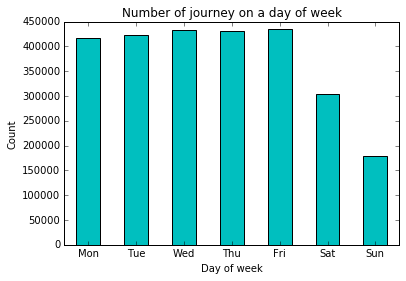

In [6]:
data["daytype"].value_counts().sort_index().plot.bar(color="c")

plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title("Number of journey on a day of week")
plt.xticks(rotation=0)
plt.show()

In [7]:
data["SubSystem"].value_counts()

LTB           1768080
LUL            723126
NR              47715
LUL/NR          25990
LUL/DLR         13911
TRAM             9583
DLR              9224
LUL/NR/LRC       8262
NR/LRC           6665
LRC              3713
LUL/LRC          3293
LUL/NR/DLR       2812
HEX               760
NR/DLR            263
LUL/TRAM           86
DLR/LRC             4
Name: SubSystem, dtype: int64

In [8]:
data["StartStn"].value_counts()

Bus                               1768080
Unstarted                           45994
Oxford Circus                       18372
Victoria                            16968
London Bridge                       16695
Liverpool Street                    15864
Canary Wharf                        12149
Stratford                           11531
Kings Cross T                       10544
Bond Street                         10530
Tottenham Court Rd                  10284
Bank                                 9521
Holborn                              9350
Piccadilly Circus                    9214
Hammersmith D                        9208
Leicester Square                     9072
Waterloo                             8494
South Kensington                     8415
Green Park                           7854
Baker Street                         7545
Brixton                              7382
Paddington                           7280
Shepherd's Bush Und                  6749
Earls Court                       

In [9]:
data["EndStation"].value_counts()

Bus                    1768080
Unfinished               35138
Oxford Circus            21652
Victoria                 18346
London Bridge            16184
Liverpool Street         14803
Canary Wharf             12177
Kings Cross T            11173
Stratford                11077
Tottenham Court Rd       11027
Bond Street              10703
Holborn                  10277
Piccadilly Circus         9669
Leicester Square          9291
Waterloo                  9129
Not Applicable            8951
Green Park                8938
Bank                      8862
Hammersmith D             8747
South Kensington          8379
Baker Street              7547
Paddington                6954
Moorgate                  6705
Brixton                   6644
Wimbledon                 6631
Shepherd's Bush Und       6502
Ealing Broadway           6499
Old Street                6484
Earls Court               6433
Euston                    6301
                        ...   
Harringay Green Las        101
Leytonst

In [10]:
data["DailyCapping"].value_counts()

N    2536287
Y      87200
Name: DailyCapping, dtype: int64

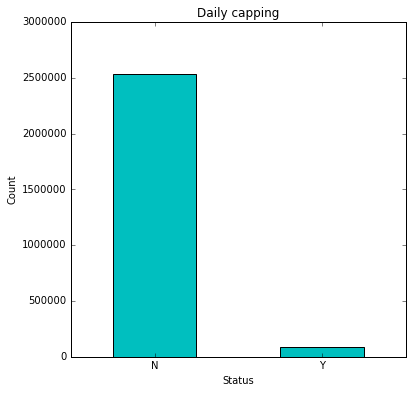

In [11]:
data["DailyCapping"].value_counts().plot.bar(figsize=(6, 6), color="c")

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Daily capping")
plt.xticks(rotation=0)
plt.show()

In [12]:
data["FinalProduct"].value_counts()

PAYG                                        915505
LUL Travelcard-7 Day                        392508
Bus & Tram Pass-7 Day                       328320
Freedom Pass (Elderly)                      256603
LUL Travelcard-1 Month                      247658
Bus & Tram Pass (Child Free)                132099
Bus & Tram Pass-1 Month                      97880
LUL Travelcard-Annual                        75167
Freedom Pass (Disabled)                      73260
Bus & Tram Pass - B&T Discount-7 Day         32818
LUL Travelcard-Time Not Captured             25787
Staff Pass - Bus Operator Nominee            10173
LUL Travelcard-Period                         9500
Staff Pass - Staff Nominee                    7067
Staff Pass - Bus Operator                     5698
Bus & Tram Pass-Annual                        4883
Bus & Tram Pass - B&T Discount-1 Month        3771
Staff Pass - Staff Retired including LCB      2377
LUL Travelcard->Annual                        1236
Tfl Travel - Free              

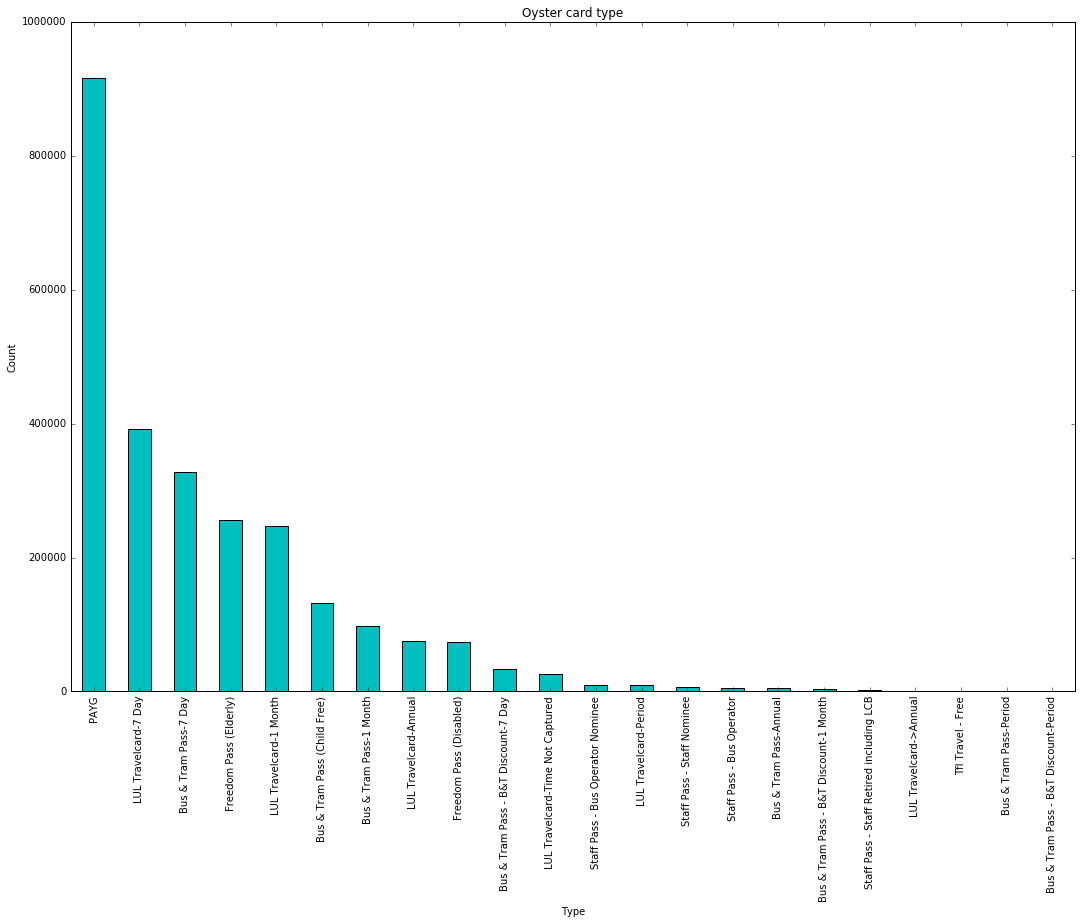

In [13]:
data["FinalProduct"].value_counts().plot.bar(figsize=(18, 12), color="c")

plt.xlabel("Type")
plt.ylabel("Count")
plt.title("Oyster card type")
plt.show()

### Tube stations locations data set

Parse the KML file to get the station coordinates as Shapely Point objects.

In [14]:
from fastkml import kml

In [15]:
station_kml = kml.KML()
station_kml.from_string(open("data/stations.kml", "rb").read())

station_map = {}

doc = list(station_kml.features())[0]

for placemark in doc.features():
    station_name = placemark.name.strip().rstrip()
    station_coordinates = placemark.geometry
    station_map[station_name] = station_coordinates

print(station_map)

{'Willesden Green Station': <shapely.geometry.point.Point object at 0x118d6db38>, 'Turnpike Lane Station': <shapely.geometry.point.Point object at 0x118d69278>, 'Ruislip Manor Station': <shapely.geometry.point.Point object at 0x118d60438>, 'East Acton Station': <shapely.geometry.point.Point object at 0x118d44eb8>, 'Bounds Green Station': <shapely.geometry.point.Point object at 0x118d3beb8>, 'Kew Gardens Station': <shapely.geometry.point.Point object at 0x118d76a58>, 'Ealing Broadway Station': <shapely.geometry.point.Point object at 0x118d44c18>, 'White City Station': <shapely.geometry.point.Point object at 0x118d6d978>, 'Chigwell Station': <shapely.geometry.point.Point object at 0x118d3eeb8>, 'Finchley Central Station': <shapely.geometry.point.Point object at 0x118d48b38>, 'Royal Albert Station': <shapely.geometry.point.Point object at 0x118d785f8>, 'Angel Station': <shapely.geometry.point.Point object at 0x118d33c18>, 'Hendon Central Station': <shapely.geometry.point.Point object at 0

### Districts of Greater London data set

Parse the KML file to get the administrative boundaries of the 33 districts of the Greater London region (32 London boroughs and the City of London) as Shapely Polygon objects.

In [16]:
authority_kml = kml.KML()
authority_kml.from_string(open("data/County_and_Unitary_Authority_December_2015_Full_Extent_Boundaries_in_England_and_Wales.kml", "rb").read())

authority_map = {}

doc = list(authority_kml.features())[0]

for folder in doc.features():
    for placemark in folder.features():
        attr = {}
        for d in placemark.extended_data.elements[0].data:
            attr[d["name"]] = d["value"]
        authority_map[attr["CTYUA15NM"]] = placemark.geometry

print(authority_map)

{'Wakefield': <shapely.geometry.polygon.Polygon object at 0x112825588>, 'North Yorkshire': <shapely.geometry.polygon.Polygon object at 0x117821240>, 'Newcastle upon Tyne': <shapely.geometry.polygon.Polygon object at 0x118167c88>, 'Kingston upon Hull, City of': <shapely.geometry.polygon.Polygon object at 0x118d37f28>, 'Windsor and Maidenhead': <shapely.geometry.polygon.Polygon object at 0x118172c50>, 'Halton': <shapely.geometry.polygon.Polygon object at 0x118d377f0>, 'Powys': <shapely.geometry.polygon.Polygon object at 0x11782cfd0>, 'Carmarthenshire': <shapely.geometry.polygon.Polygon object at 0x117839128>, 'Leicester': <shapely.geometry.polygon.Polygon object at 0x1178024e0>, 'Cambridgeshire': <shapely.geometry.polygon.Polygon object at 0x117813550>, 'Camden': <shapely.geometry.polygon.Polygon object at 0x1128365c0>, 'Salford': <shapely.geometry.polygon.Polygon object at 0x118176f98>, 'Liverpool': <shapely.geometry.polygon.Polygon object at 0x118165470>, 'Derby': <shapely.geometry.pol

Map tube stations to their corresponding districts in Greater London.

In [17]:
station_district_map = {}

for station in station_map:
    for district in authority_map:
        if station_map[station].within(authority_map[district]) == 1:
            station_district_map[station] = district

print(station_district_map)

{'Camden Town Station': 'Camden', 'Tottenham Court Road Station': 'Westminster', 'East Acton Station': 'Hammersmith and Fulham', 'Bounds Green Station': 'Haringey', 'Kew Gardens Station': 'Richmond upon Thames', 'Brent Cross Station': 'Barnet', 'Ealing Broadway Station': 'Ealing', 'Lewisham Station': 'Lewisham', 'Chigwell Station': 'Essex', 'Finchley Central Station': 'Barnet', 'Royal Albert Station': 'Newham', 'Angel Station': 'Islington', 'Hendon Central Station': 'Barnet', 'Queensway Station': 'Westminster', 'Clapham South Station': 'Wandsworth', 'Chiswick Park Station': 'Ealing', 'Moorgate Station': 'City of London', 'Park Royal Station': 'Ealing', 'Canons Park Station': 'Harrow', 'Holland Park Station': 'Kensington and Chelsea', 'Prince Regent Station': 'Newham', 'Roding Valley Station': 'Essex', 'Heathrow Terminal 4 Station': 'Hillingdon', 'London Bridge Station': 'Southwark', 'Alperton Station': 'Brent', 'Hanger Lane Station': 'Ealing', 'Edgware Road Circle Station': 'Westminste

Expand the original Oyster card data set with 2 new columns: StartDistrict and EndDistrict.

In [18]:
import re

def clean_station(k):
    clean = " ".join([word for word in k.split() if len(word)>3])
    return re.sub('\W', "", clean)

clean_station_district_map = {}
assert clean_station_district_map == {}
clean_station_district_map = dict([(clean_station(k), v) for k, v in station_district_map.items()])    

def station_to_district(station):
    full_station_name = clean_station(station + " Station")
    if full_station_name in clean_station_district_map:
        return clean_station_district_map[full_station_name]
    else:
        return None

### Oyster card data - cleaning and filtering

Scope
- Only London Underground, DLR, and London Overground journeys are used out of all transpot modes.
- Unstarted and unfinished journeys are excluded.

In [19]:
data["StartDistrict"] = data["StartStn"].apply(station_to_district)
data["EndDistrict"] = data["EndStation"].apply(station_to_district)

data

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,StartDistrict,EndDistrict
0,3,Tue,LUL,Unstarted,Kings Cross M,0,00:00,633,10:33,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,None
1,4,Wed,LUL,Unstarted,Sudbury Hill,0,00:00,447,07:27,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),None,Harrow
2,3,Tue,NR,Unstarted,Richmond,0,00:00,966,16:06,Z0304,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,Richmond upon Thames
3,4,Wed,NR,Unstarted,Romford,0,00:00,657,10:57,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),None,None
4,6,Fri,NR,Unstarted,Norwood Junction SR,0,00:00,450,07:30,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,None
5,6,Fri,LUL,Unstarted,Clapham Common,0,00:00,439,07:19,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,Lambeth
6,5,Thu,NR,Unstarted,Norwood Junction SR,0,00:00,454,07:34,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,None
7,5,Thu,NR,Unstarted,Norbury,0,00:00,955,15:55,Z0203,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,None
8,5,Thu,LUL,Unstarted,Clapham Common,0,00:00,431,07:11,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,Lambeth
9,2,Mon,LUL,Unstarted,Kings Cross M,0,00:00,498,08:18,Z0104,TKT,N,0,0,XX,LUL Travelcard-7 Day,None,None


In [20]:
tube_data = data[((data["SubSystem"] == "LUL") | 
                 (data["SubSystem"] == "LUL/DLR") | 
                 (data["SubSystem"] == "DLR") | 
                 (data["SubSystem"] == "LRC") | 
                 (data["SubSystem"] == "LUL/LRC") | 
                 (data["SubSystem"] == "DLR/LRC")) & 
                 (data["StartStn"] != "Unstarted") & 
                 (data["StartStn"] != "Not Applicable") & 
                 (data["EndStation"] != "Unfinished") & 
                 (data["EndStation"] != "Not Applicable")]

tube_data

,downo,daytype,SubSystem,StartStn,EndStation,EntTime,EntTimeHHMM,ExTime,EXTimeHHMM,ZVPPT,JNYTYP,DailyCapping,FFare,DFare,RouteID,FinalProduct,StartDistrict,EndDistrict
45989,2,Mon,LUL,Goodge Street,Totteridge,1000,16:40,1041,17:21,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),Camden,None
45994,5,Thu,LUL,Preston Road,Northwood,1000,16:40,1024,17:04,Z0110,TKT,N,0,0,XX,Freedom Pass (Disabled),Brent,Hillingdon
45998,5,Thu,LUL,Holborn,Bounds Green,1000,16:40,1028,17:08,Z0104,TKT,N,0,0,XX,LUL Travelcard-Annual,Camden,Haringey
46003,1,Sun,LUL,Earls Court,Pimlico,1000,16:40,1021,17:01,-------,PPY,N,160,160,XX,PAYG,Kensington and Chelsea,Westminster
46005,3,Tue,LUL,Victoria,Bethnal Green,1000,16:40,1027,17:07,Z0102,TKT,N,0,0,XX,LUL Travelcard-7 Day,Westminster,Tower Hamlets
46019,2,Mon,LUL,Highbury,Stratford,1000,16:40,1020,17:00,-------,PPY,N,110,110,XX,PAYG,None,Newham
46025,7,Sat,LUL,Embankment,Putney Bridge,1000,16:40,1026,17:06,-------,PPY,N,160,160,XX,PAYG,Westminster,Hammersmith and Fulham
46029,4,Wed,LUL,Monument,Tufnell Park,1000,16:40,1031,17:11,-------,PPY,N,220,220,XX,PAYG,City of London,Islington
46031,5,Thu,LUL,South Kensington,Victoria,1000,16:40,1006,16:46,Z0110,TKT,N,0,0,XX,Freedom Pass (Elderly),Kensington and Chelsea,Westminster
46033,4,Wed,LUL,St James's Park,Temple,1000,16:40,1009,16:49,Z0103,TKT,N,0,0,XX,LUL Travelcard-7 Day,Westminster,Westminster


In [21]:
tube_data["SubSystem"].value_counts()

LUL        679082
LUL/DLR     13911
DLR          8025
LRC          3284
LUL/LRC      3086
DLR/LRC         4
Name: SubSystem, dtype: int64

In [22]:
tube_data.shape

(707392, 18)

Number of tube journey (i.e. number of rows) available for use after cleaning and filtering = 707,392

Create a matrix of districts for visualization.

In [23]:
district_name = list(set(station_district_map.values()))
district_name.sort()

district_matrix = np.zeros((len(district_name), len(district_name)))

for start_district, end_district in tube_data[["StartDistrict", "EndDistrict"]].as_matrix():
    if start_district is None or end_district is None:
        continue
    start_district_index = district_name.index(start_district)
    end_district_index = district_name.index(end_district)
    district_matrix[start_district_index, end_district_index] += 1

district_matrix

array([[  1.25300000e+03,   2.90000000e+01,   3.80000000e+01,
          1.00000000e+00,   2.54000000e+02,   4.75000000e+02,
          3.90000000e+01,   1.40000000e+01,   3.20000000e+01,
          8.80000000e+01,   7.00000000e+00,   1.14000000e+02,
          4.10000000e+01,   1.80000000e+01,   3.66000000e+02,
          0.00000000e+00,   1.90000000e+01,   3.50000000e+01,
          1.56000000e+02,   2.42000000e+02,   1.73000000e+02,
          6.00000000e+00,   1.30000000e+01,   1.00800000e+03,
          5.40000000e+01,   2.00000000e+00,   2.81000000e+02,
          9.69000000e+02,   1.03000000e+02,   4.40000000e+01,
          8.57000000e+02],
       [  4.00000000e+01,   2.96400000e+03,   4.40000000e+01,
          3.00000000e+00,   3.65800000e+03,   1.49200000e+03,
          7.50000000e+01,   1.40000000e+01,   1.80000000e+01,
          5.40000000e+01,   4.00000000e+01,   2.27000000e+02,
          3.38000000e+02,   1.20000000e+01,   1.20000000e+01,
          0.00000000e+00,   2.90000000e+01,

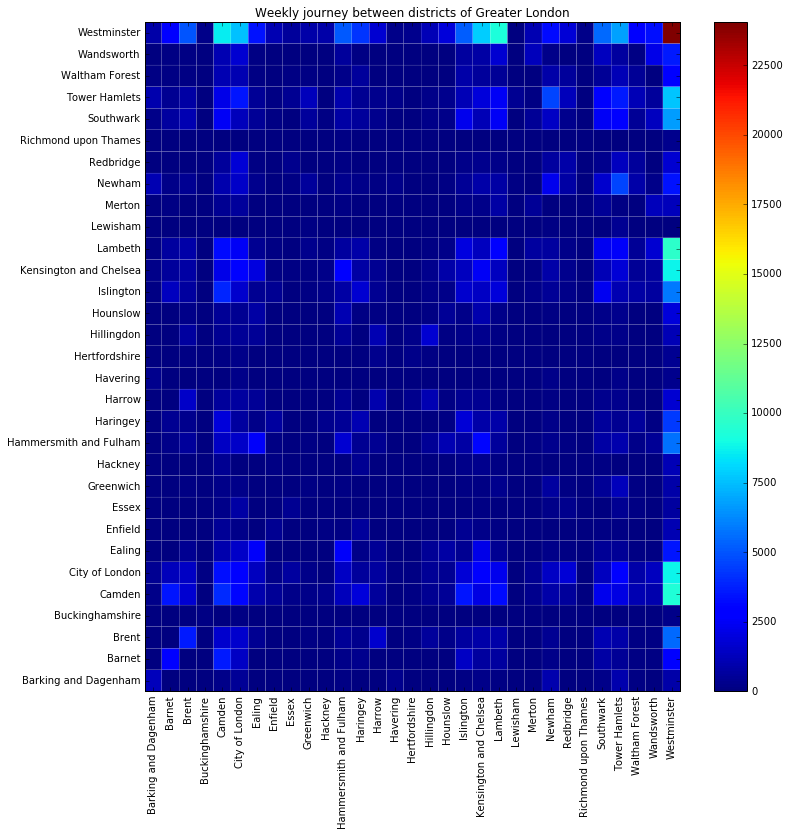

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))

plt.pcolor(district_matrix, edgecolors="w", linewidths=0.1)

plt.title("Weekly journey between districts of Greater London")
plt.xlim(0, district_matrix.shape[0])
plt.ylim(0, district_matrix.shape[1])
ax.set_xticks(np.arange(district_matrix.shape[0]) + 0.5)
ax.set_xticklabels(district_name, rotation = 90)
ax.set_yticks(np.arange(district_matrix.shape[1]) + 0.5)
ax.set_yticklabels(district_name)

plt.colorbar()

### Extra

Reconcile discrepancies of station names between the Oyster data set and stations locations data set.

In [25]:
oyster_stations_data = set(tube_data["StartStn"]) | set(tube_data["EndStation"])

count_not_match = 0

for station in oyster_stations_data:
    if clean_station(station + " Station") not in clean_station_district_map:
        print(station)
        count_not_match += 1

print("Accuracy = " + str(1 - float(count_not_match) / len(oyster_stations_data)))

London City Airport
Gospel Oak
Heathrow Term 4
King George V
Homerton
Brondesbury Park
Upper Holloway
South Acton
West Hampst'd NL
Caledonian Rd&B'sby
Woolwich Arsenal DLR
Shepherd's Bush NR
West Silvertown
Crossharbour
Bromley By Bow
Great Portland St
Kensal Rise
Carpenders Park
Dalston Kingsland
Hampstead Heath
Camden Road
Langdon Park
South Tottenham
Tottenham Court Rd
Kings Cross T
Shepherd's Bush Und
High Street Kens
Finchley Rd & Frognal
Imperial Wharf
Leytonstone High Rd
Edgware Road M
Hackney Central
Kilburn High Road
Pontoon Dock
Canonbury
Woodgrange Park
Shepherd's Bush Mkt
Wanstead Park
Hackney Wick
Headstone Lane
Watford High Street
Harringay Green Las
Edgware Road B
Leyton Midland Road
Brondesbury
South Hampstead
Heathrow Terms 123
Acton Central
Highbury
Hatch End
Walthamstow Qns R
Crouch Hill
Heathrow Term 5
Kings Cross M
Totteridge
West Hampst'd Tlink
Wood Lane
Kentish Town West
Bushey
Accuracy = 0.8264705882352941


Accuracy of station names matching = 83%

Number of journey not captured because of the station name discrepancy.

In [26]:
tube_data[tube_data["StartDistrict"].isnull()]["StartStn"].value_counts()

Tottenham Court Rd       9694
Kings Cross T            9506
Shepherd's Bush Und      6648
Highbury                 4482
Kings Cross M            3580
High Street Kens         2868
Great Portland St        2179
Heathrow Terms 123       1941
Edgware Road M           1727
Woolwich Arsenal DLR     1297
Edgware Road B           1130
Bromley By Bow            980
Shepherd's Bush Mkt       931
Heathrow Term 5           887
Totteridge                634
Wood Lane                 556
Crossharbour              498
London City Airport       426
Heathrow Term 4           340
Shepherd's Bush NR        329
Watford High Street       313
West Silvertown           295
Langdon Park              239
Carpenders Park           213
King George V             207
Hatch End                 165
Imperial Wharf            162
West Hampst'd Tlink       148
Bushey                    138
Upper Holloway            130
Kilburn High Road         117
Pontoon Dock              115
South Tottenham           115
Leyton Mid

In [27]:
tube_data[tube_data["EndDistrict"].isnull()]["EndStation"].value_counts()

Tottenham Court Rd       10536
Kings Cross T            10153
Shepherd's Bush Und       6243
Highbury                  4374
Kings Cross M             3247
High Street Kens          3043
Great Portland St         2095
Heathrow Terms 123        1772
Edgware Road M            1754
Woolwich Arsenal DLR      1197
Edgware Road B            1041
Bromley By Bow             894
Shepherd's Bush Mkt        879
Wood Lane                  707
Totteridge                 632
Crossharbour               483
London City Airport        402
Shepherd's Bush NR         361
Heathrow Term 4            348
Watford High Street        342
West Silvertown            247
Langdon Park               242
Carpenders Park            208
King George V              196
Hatch End                  165
Bushey                     150
Imperial Wharf             146
Leyton Midland Road        142
South Tottenham            134
Upper Holloway             126
Kilburn High Road          108
Pontoon Dock               108
West Ham

Potential solution #1: regular expression

In [28]:
import re

for station in oyster_stations_data:
    if (station + " Station") not in station_district_map:
        print(station)
        clean = " ".join([word for word in station.split() if len(word) > 3])
        print(re.sub('\W', "", clean))

London City Airport
LondonCityAirport
Kensington Olympia
KensingtonOlympia
Gospel Oak
Gospel
Heathrow Term 4
HeathrowTerm
King George V
KingGeorge
Homerton
Homerton
Brondesbury Park
BrondesburyPark
Upper Holloway
UpperHolloway
South Acton
SouthActon
West Hampst'd NL
WestHampstd
Caledonian Rd&B'sby
CaledonianRdBsby
Woolwich Arsenal DLR
WoolwichArsenal
Shepherd's Bush NR
ShepherdsBush
West Silvertown
WestSilvertown
Queens Park
QueensPark
Crossharbour
Crossharbour
Bromley By Bow
Bromley
Canary Wharf DLR
CanaryWharf
Great Portland St
GreatPortland
Custom House DLR
CustomHouse
St Pauls
Pauls
Kensal Rise
KensalRise
Carpenders Park
CarpendersPark
Dalston Kingsland
DalstonKingsland
Hampstead Heath
HampsteadHeath
Lewisham DLR
Lewisham
Harrow On The Hill
HarrowHill
Camden Road
CamdenRoad
Langdon Park
LangdonPark
South Tottenham
SouthTottenham
Tottenham Court Rd
TottenhamCourt
St James's Park
JamessPark
Kings Cross T
KingsCross
Shepherd's Bush Und
ShepherdsBush
St Johns Wood
JohnsWood
High Street

Potential solution #2: Fuzzy Wuzzy

In [30]:
from fuzzywuzzy import process

for station in oyster_stations_data:
    if clean_station(station + " Station") not in clean_station_district_map:
        print(station)
        print(process.extractOne(clean_station(station + " Station"), clean_station_district_map.keys()))
        count_not_match += 1

London City Airport
('PoplarStation', 75)
Gospel Oak
('AngelStation', 80)
Heathrow Term 4
('HeathrowTerminalStation', 90)
King George V
('KingsburyStation', 73)
Homerton
('AlpertonStation', 80)
Brondesbury Park
('ParkStation', 90)
Upper Holloway
('HollowayRoadStation', 77)
South Acton
('NorthActonStation', 88)
West Hampst'd NL
('WestHampsteadStation', 95)
Caledonian Rd&B'sby
('CaledonianRoadStation', 86)
Woolwich Arsenal DLR
('ArsenalStation', 90)
Shepherd's Bush NR
('ShepherdsBushCentralStation', 85)
West Silvertown
('KentonStation', 76)
Crossharbour
('BurntStation', 78)
Bromley By Bow
('CroxleyStation', 86)
Great Portland St
('GreatPortlandStreetStation', 87)
Kensal Rise
('KensalGreenStation', 86)
Carpenders Park
('ParkStation', 90)
Dalston Kingsland
('BankStation', 74)
Hampstead Heath
('HampsteadStation', 86)
Camden Road
('RoadStation', 90)
Langdon Park
('ParkStation', 90)
South Tottenham
('TottenhamHaleStation', 78)
Tottenham Court Rd
('TottenhamCourtRoadStation', 91)
Kings Cross T